diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.

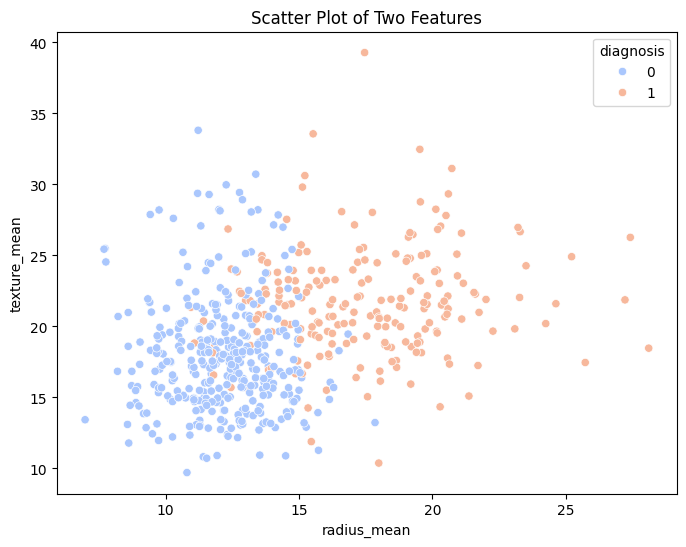

Best K without PCA: 9, Accuracy: 0.9649
Best K with PCA: 8, Accuracy: 0.9825


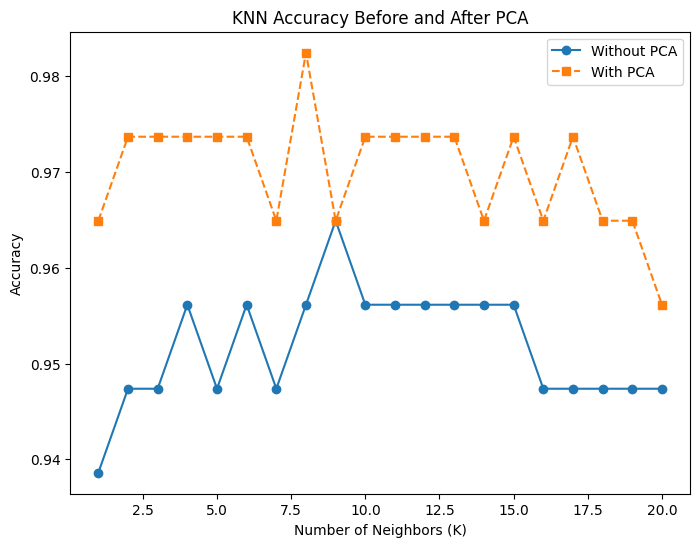

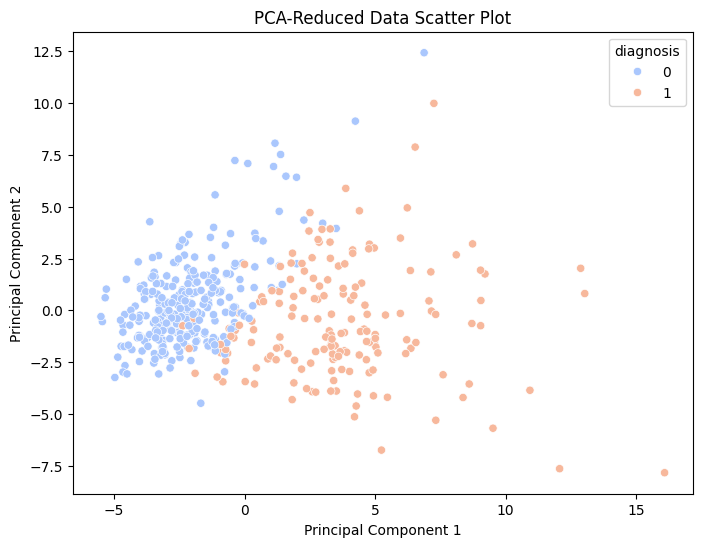

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("data.csv")  # Replace with actual file path

# Basic EDA
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)  # Dropping unnecessary columns
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])  # Convert M/B to 1/0

# Checking for missing values
print(df.isnull().sum())

# Descriptive statistics
print(df.describe())

# Scatter plot of first two features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 1], y=df.iloc[:, 2], hue=df['diagnosis'], palette='coolwarm')
plt.title("Scatter Plot of Two Features")
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2])
plt.show()

# Splitting data into train and test sets
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Finding best K value without PCA
accuracy_scores = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

best_k = np.argmax(accuracy_scores) + 1  # Adjusting index

# Train KNN with best K without PCA
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred)

# Apply PCA
pca = PCA(n_components=2)  # Reduce dimensions to 2 for visualization
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Finding best K value with PCA
accuracy_scores_pca = []

for k in k_range:
    knn_pca = KNeighborsClassifier(n_neighbors=k)
    knn_pca.fit(X_train_pca, y_train)
    y_pred_pca = knn_pca.predict(X_test_pca)
    accuracy_scores_pca.append(accuracy_score(y_test, y_pred_pca))

best_k_pca = np.argmax(accuracy_scores_pca) + 1

# Train KNN with best K after PCA
knn_pca = KNeighborsClassifier(n_neighbors=best_k_pca)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_pca)

# Compare Accuracy Before & After PCA
print(f"Best K without PCA: {best_k}, Accuracy: {accuracy_no_pca:.4f}")
print(f"Best K with PCA: {best_k_pca}, Accuracy: {accuracy_with_pca:.4f}")

# Plot accuracy comparison
plt.figure(figsize=(8, 6))
plt.plot(k_range, accuracy_scores, marker='o', label="Without PCA")
plt.plot(k_range, accuracy_scores_pca, marker='s', linestyle='dashed', label="With PCA")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy Before and After PCA")
plt.legend()
plt.show()

# Scatter plot of PCA-reduced data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='coolwarm')
plt.title("PCA-Reduced Data Scatter Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
